### What is L2 Regularization?

L2 regularization is a technique used in regression models (like Linear Regression) to reduce overfitting by penalizing large coefficients.
It’s also called Ridge Regression.

The idea is simple:

- Normally, Linear Regression finds coefficients (β) that minimize the squared error.
- In Ridge Regression, we add a penalty term that is the sum of squares of coefficients.

### 🔹 Formula

For Linear Regression, the cost function (without regularization) is:

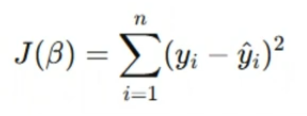

For Ridge (L2), we add the penalty term:

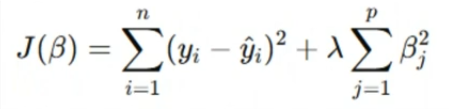

Where:

- 𝜆 = regularization strength (hyperparameter)
- 𝛽𝑗 = model coefficients

### 🔹 Intuition

- The extra term λ∑βj^2 forces coefficients to be small.
- Unlike L1 (Lasso), Ridge does not make coefficients zero; it only shrinks them closer to zero.
- This helps when you have many correlated features (multicollinearity).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

### 1. Load dataset

In [ ]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

In [ ]:
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### 2. Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Ridge Regression

In [ ]:
ridge = Ridge(alpha=10)  # alpha is the regularization strength
ridge.fit(X_train, y_train)

Ridge(alpha=10)

### 4. Coefficients

In [ ]:
coefficients = ridge.coef_

In [ ]:
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
coefficients

array([ 18.22962257,  -3.27753564,  65.12841688,  48.21966755,
        16.23831513,  10.86105458, -39.20891284,  41.43856828,
        57.95012433,  39.35940115])

### 5. Plot coefficients

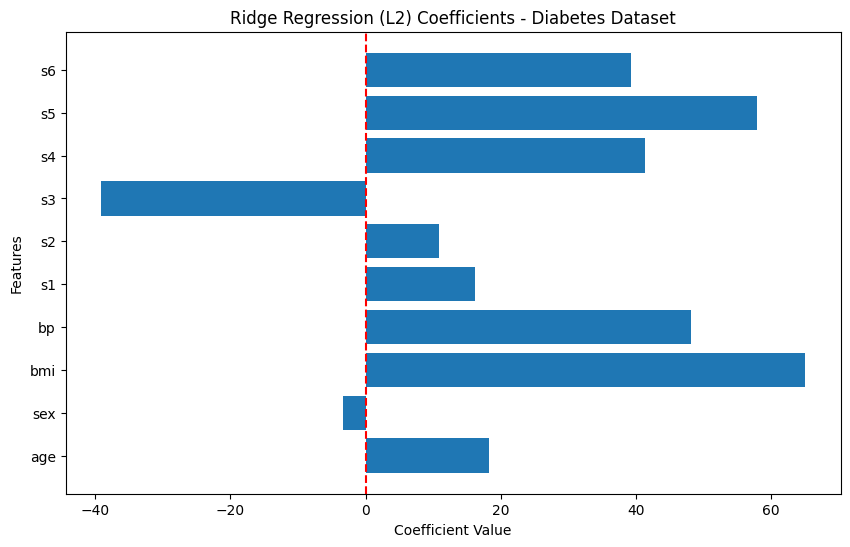

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(feature_names, coefficients)
plt.axvline(0, color="red", linestyle="--")
plt.title("Ridge Regression (L2) Coefficients - Diabetes Dataset")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()

### 6. Model performance

In [ ]:
print("Ridge Training R^2 Score:", ridge.score(X_train, y_train))
print("Ridge Testing R^2 Score:", ridge.score(X_test, y_test))

Ridge Training R^2 Score: 0.163322412645444
Ridge Testing R^2 Score: 0.161225867509881


🔍 What does alpha do?

- If α = 0 → Ridge becomes normal Linear Regression (no penalty).
- If α is very small (0.01, 0.1) → penalty is weak → coefficients are close to linear regression.
- If α is moderate (1, 10) → penalty increases → coefficients shrink, model becomes less complex.
- If α is very large (100, 1000) → coefficients shrink a lot, sometimes almost all near 0 → underfitting.

| Feature        | Linear Regression Coefficient | Ridge (α=1) | Ridge (α=100) |
| -------------- | ----------------------------- | ----------- | ------------- |
| Size (sqft)    | 250                           | 200         | 50            |
| Location score | 1500                          | 1000        | 100           |
| Door color     | 300                           | 10          | \~0           |
